# Model Building


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
from sklearn import metrics
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
import statsmodels.api as sm
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import pickle
import datetime as dt

## Feature Engineering

In [2]:
df = pd.read_csv("D:\Python Labs\Python Class Project/book_data_cleaned.csv", sep=",", index_col="bookID")

In [3]:
df.head()

,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,month,date,year,Age_of_book
bookID,,,,,,,,,,,,,,,
1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling,4.57,439785960,9.780440e+12,eng,652,2095690,27591,2006-09-16,Scholastic Inc.,9,16,2006,15.0
2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling,4.49,439358078,9.780440e+12,eng,870,2153167,29221,2004-09-01,Scholastic Inc.,9,1,2004,17.0
4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,439554896,9.780440e+12,eng,352,6333,244,2003-11-01,Scholastic,11,1,2003,18.0
5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling,4.56,043965548X,9.780440e+12,eng,435,2339585,36325,2004-05-01,Scholastic Inc.,5,1,2004,18.0
8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling,4.78,439682584,9.780440e+12,eng,2690,41428,164,2004-09-13,Scholastic,9,13,2004,17.0


As discussed while clearning the data, we can remove ISBN, ISBN13 and publication_date from the data since they it can be assumed that they may not influence the outcome in anyway.

In [4]:
df = df.drop(["isbn", "isbn13", "publication_date"], axis=1)

Here, we can consider Title, Authors, Average ratings, language, number of pages, ratings count, text reviews count, publisher month, date, year and age of the book. Later, we can encode the categorial variables title, authors and publishers.

In [5]:
df_model = df[['title', 'authors', 'average_rating', 'language_code', 'num_pages', 'ratings_count', 'text_reviews_count', 
               'publisher', 'month', 'date', 'year', 'Age_of_book']]

In [6]:
le = preprocessing.LabelEncoder()
df_model['title'] = le.fit_transform(df_model['title'])
df_model['authors'] = le.fit_transform(df_model['authors'])
df_model['publisher'] = le.fit_transform(df_model['publisher'])

As far as languages are concerned, it will better to convert them into dummies.

In [7]:
df_dum = pd.get_dummies(df_model['language_code'])
df_model = pd.concat([df_model, df_dum], axis = 1)

In [8]:
df_model.head()

,title,authors,average_rating,language_code,num_pages,ratings_count,text_reviews_count,publisher,month,date,...,nl,nor,por,rus,spa,srp,swe,tur,wel,zho
bookID,,,,,,,,,,,,,,,,,,,,,
1,3071,2623,4.57,eng,652,2095690,27591,1779,9,16,...,0,0,0,0,0,0,0,0,0,0
2,3072,2623,4.49,eng,870,2153167,29221,1779,9,1,...,0,0,0,0,0,0,0,0,0,0
4,3069,2623,4.42,eng,352,6333,244,1774,11,1,...,0,0,0,0,0,0,0,0,0,0
5,3074,2623,4.56,eng,435,2339585,36325,1779,5,1,...,0,0,0,0,0,0,0,0,0,0
8,3064,2623,4.78,eng,2690,41428,164,1774,9,13,...,0,0,0,0,0,0,0,0,0,0


Here, Average Rating and language code are removed from features. Average Rating is the target or a parameter to be predicted. Also, languages are already converted into dummies.

In [9]:
X = df_model.drop(['average_rating', 'language_code'], axis = 1)
y = df_model['average_rating'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

Let's confirm how many rows are created the model.

In [10]:
len(df_model)

11125

In [11]:
len(X_train)

8900

In [12]:
len(X_test)

2225

Before actually training the model with any method, let's try to understand the quality of model for Ordinary Least Squared Linear Regression.

## Model Selection

In [13]:
X_sm = X = sm.add_constant(X)
model = sm.OLS(y,X_sm)
model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.049
Model:                            OLS   Adj. R-squared:                  0.045
Method:                 Least Squares   F-statistic:                     15.73
Date:                Sun, 26 Jun 2022   Prob (F-statistic):           7.57e-94
Time:                        16:40:55   Log-Likelihood:                -3907.2
No. Observations:               11125   AIC:                             7888.
Df Residuals:                   11088   BIC:                             8159.
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 18.6318     26.477      0.704      0.482     -33.268      70.532
title               2.196e-06   1.11e-06      1.981      0.048    2.31e-08    4.37e-06
authors             2.984e-06   1.72e-06      1.738      0.082   -3.81e-07    6.35e-06
num_pages              0.0002   1.36e-05     16.180      0.000       0.000       0.000
ratings_count        9.91e-08   5.81e-08      1.706      0.088   -1.48e-08    2.13e-07
text_reviews_count  5.329e-07   2.54e-06      0.209      0.834   -4.45e-06    5.52e-06
publisher           8.356e-06   4.86e-06      1.720      0.085   -1.17e-06    1.79e-05
month                  0.0011      0.002      0.548      0.584      -0.003       0.005
date                  -0.0001      0.000     -0.418      0.676      -0.001       0.000
year                  -0.0077      0.014     -0.567      0.570      -0.034       0.019
Age_of_book           -0.0065      0.014     -0.481      0.631      -0.033       0.020
ale                    1.1565      1.037      1.115      0.265      -0.877       3.190
ara                    0.3556      1.037      0.343      0.732      -1.678       2.389
en-CA                  0.8555      0.989      0.865      0.387      -1.082       2.793
en-GB                  0.7331      0.982      0.747      0.455      -1.192       2.658
en-US                  0.7207      0.982      0.734      0.463      -1.204       2.645
eng                    0.7360      0.982      0.750      0.454      -1.189       2.661
enm                    0.5096      1.001      0.509      0.611      -1.453       2.472
fre                    0.7798      0.983      0.793      0.428      -1.147       2.707
ger                    0.7476      0.982      0.761      0.447      -1.178       2.673
gla                    1.3149      1.031      1.275      0.202      -0.706       3.336
glg                    0.0914      1.042      0.088      0.930      -1.952       2.134
grc                    0.4882      0.988      0.494      0.621      -1.448       2.424
ita                    0.8728      0.994      0.878      0.380      -1.077       2.822
jpn                    1.0838      0.983      1.102      0.270      -0.843       3.011
lat                    1.2081      1.001      1.207      0.227      -0.754       3.170
msa                    0.8296      1.031      0.805      0.421      -1.192       2.851
mul                    0.8889      0.985      0.902      0.367      -1.042       2.820
nl                     0.8778      1.031      0.851      0.395      -1.143       2.899
nor                    0.4390      1.034      0.425      0.671      -1.588       2.466
por                    0.7894      0.987      0.800      0.424      -1.144       2.723
rus                    1.0375      1.008      1.029      0.303      -0.938       3.013
spa                    0.7362      0.9

### Coefficient:

The coefficient term tells the change in Y for a unit change in X. In this case, it is far off from 1 in most of the cases except for a few languages. It can be coincidence.

### Standard error of parameters: 

Standard error is also called the standard deviation. Standard error shows the sampling variability of these parameters. As expected all categorised parameters are meaningless.

### t-statistics and p-value:

They help us to know whether null hypothesis is true or not. From almost all given p-values we fail to reject the null hypothesis.

### R – squared value: 

R2 is the coefficient of determination that tells us that how much percentage variation independent variable can be explained by independent variable. Unfortunately, only 4.9% variation can be explained by given parameters. 

### Adj. R-squared: 

This is the modified version of R-squared which is adjusted for the number of variables in the regression. It increases only when an additional variable adds to the explanatory power to the regression. Since, there is hardly change in this value, it is again clear that it is hard to predict ratings.

### Prob(F-Statistic): 

This tells the overall significance of the regression. As per the above results, probability is close to zero. This implies that overall the regressions is meaningful.

### Omnibus / Prob(Omnibus): 

One of the assumptions of OLS is that the errors are normally distributed. We hope to see the value for Omnibus close to zero which would indicate normalcy.  Prob(Omnibus) is supposed to be close to the 1 in order for it to satisfy the OLS assumption. However, the values from the test indicate that the data is not normally distributed at all.

Looking at the constraints, we can select regression models in this case.

# Linear regression

First we will try the linear regression model as follows.

In [14]:
lr=LinearRegression()
lr.fit(X_train, y_train)
y_train_pred_lr = lr.predict(X_train)
y_test_pred_lr = lr.predict(X_test)

## Evaluating the Linear Regression model

(0.0, 5.0)

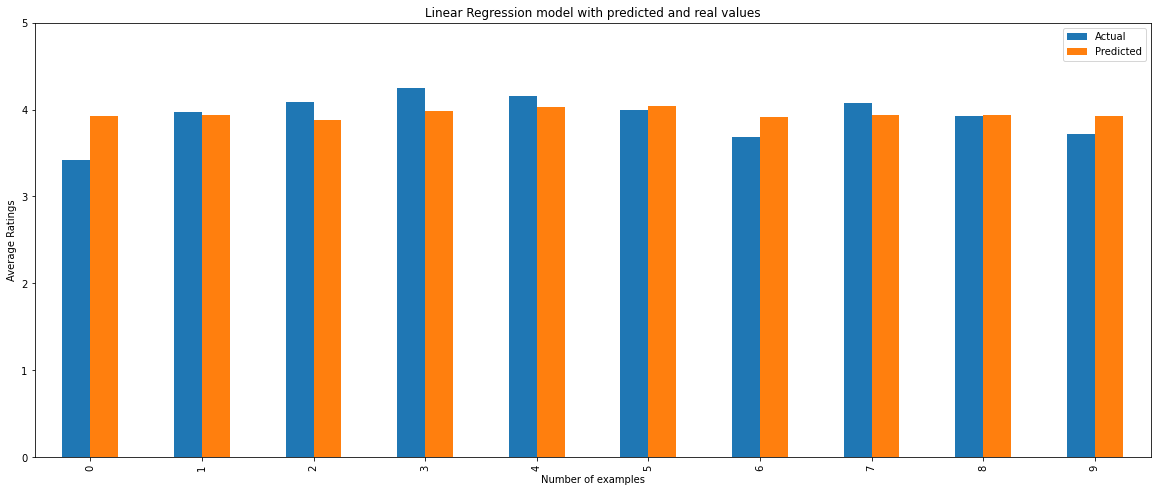

In [15]:
pred = pd.DataFrame({'Actual': y_test.tolist(), 'Predicted': y_test_pred_lr.tolist()}).head(10)
pred.head(10)
pred.plot(kind='bar', figsize=(20, 8))
plt.title('Linear Regression model with predicted and real values')
plt.xlabel('Number of examples')
plt.ylabel('Average Ratings')
plt.ylim(0,5)

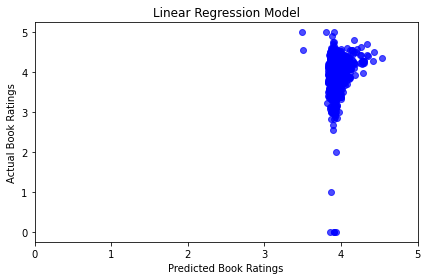

In [16]:
plt.scatter(y_test_pred_lr, y_test, alpha = 0.7, color = 'b')
plt.xlabel('Predicted Book Ratings')
plt.ylabel('Actual Book Ratings')
plt.title('Linear Regression Model')
plt.tight_layout()
plt.xlim(0,5)
plt.show()

Visually, it seems that the model works okay for all books that may have ratings at areound 4. For any rating below that, it is terrible model.

### MAE, MSE, R^2, RMSE

In [17]:
print('MAE in Linear Regression train: %.3f, test: %.3f' % (
        mean_absolute_error(y_train, y_train_pred_lr),
        mean_absolute_error(y_test, y_test_pred_lr)))
print('MSE in Linear Regression train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_pred_lr),
        mean_squared_error(y_test, y_test_pred_lr)))
print('R^2 in Linear Regression train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_pred_lr),
        r2_score(y_test, y_test_pred_lr)))
print('RMSE in Linear Regression train: %.3f, test: %.3f' % (
        np.sqrt(metrics.mean_squared_error(y_train, y_train_pred_lr)),
        np.sqrt(metrics.mean_squared_error(y_test, y_test_pred_lr))))

MAE in Linear Regression train: 0.230, test: 0.220
MSE in Linear Regression train: 0.121, test: 0.109
R^2 in Linear Regression train: 0.048, test: 0.039
RMSE in Linear Regression train: 0.348, test: 0.330


# Random Forest

In [18]:
forest = RandomForestRegressor(n_estimators=1000, 
                               criterion='squared_error', 
                               random_state=1, 
                               n_jobs=-1)
forest.fit(X_train, y_train)
y_train_pred_rf = forest.predict(X_train)
y_test_pred_rf = forest.predict(X_test)

## Evaluating the Linear Regression model

(0.0, 5.0)

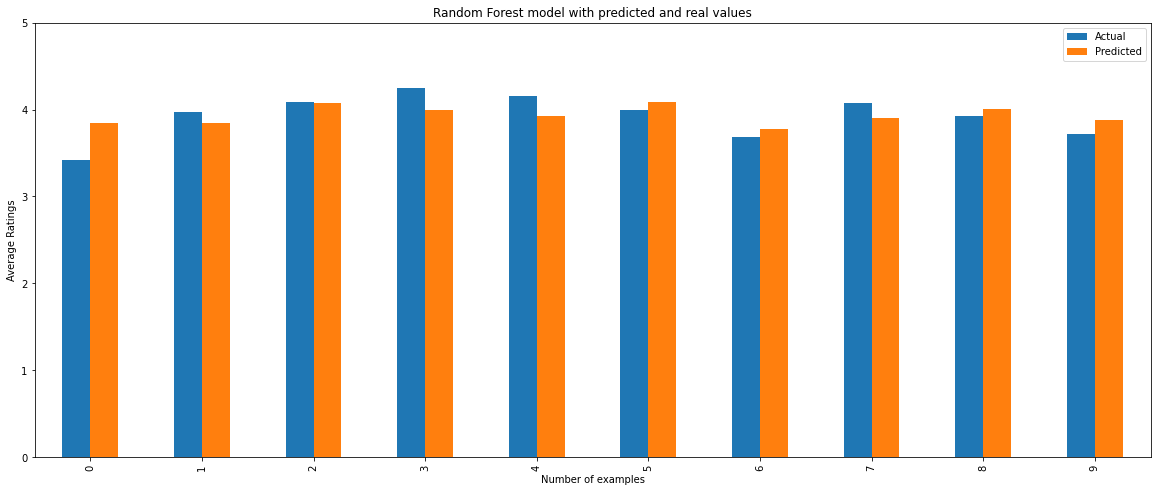

In [19]:
pred1 = pd.DataFrame({'Actual': y_test.tolist(), 'Predicted': y_test_pred_rf.tolist()}).head(10)
pred1.head(10)
pred1.plot(kind='bar', figsize=(20, 8))
plt.title('Random Forest model with predicted and real values')
plt.xlabel('Number of examples')
plt.ylabel('Average Ratings')
plt.ylim(0,5)

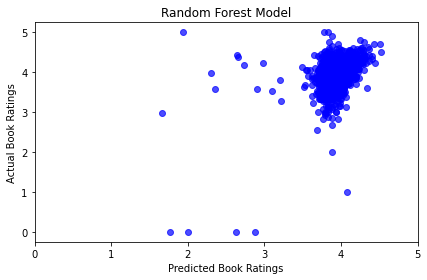

In [20]:
plt.scatter(y_test_pred_rf, y_test, alpha = 0.7, color = 'b')
plt.xlabel('Predicted Book Ratings')
plt.ylabel('Actual Book Ratings')
plt.title('Random Forest Model')
plt.tight_layout()
plt.xlim(0,5)
plt.show()

### MAE, MSE, R^2, RMSE

In [21]:
print('MAE in Random Forest train: %.3f, test: %.3f' % (
        mean_absolute_error(y_train, y_train_pred_rf),
        mean_absolute_error(y_test, y_test_pred_rf)))
print('MSE in Random Forest train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_pred_rf),
        mean_squared_error(y_test, y_test_pred_rf)))
print('R^2 in Random Forest train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_pred_rf),
        r2_score(y_test, y_test_pred_rf)))
print('RMSE in Random Forest train: %.3f, test: %.3f' % (
        np.sqrt(metrics.mean_squared_error(y_train, y_train_pred_rf)),
        np.sqrt(metrics.mean_squared_error(y_test, y_test_pred_rf))))

MAE in Random Forest train: 0.080, test: 0.211
MSE in Random Forest train: 0.015, test: 0.094
R^2 in Random Forest train: 0.884, test: 0.165
RMSE in Random Forest train: 0.121, test: 0.307


# Lighter Linear Regression model

In the previous Linear Regression model, we used some of the categorical variables. Also, we did not convert the average ratings into classes. Here, we attempt a Lighter model without categorical variables and target in the form of classes.

In [22]:
df_model1 = df[['average_rating', 'num_pages', 'ratings_count', 'text_reviews_count', 'month', 'date', 'year', 'Age_of_book']]

In [23]:
df_model1.head()

,average_rating,num_pages,ratings_count,text_reviews_count,month,date,year,Age_of_book
bookID,,,,,,,,
1,4.57,652,2095690,27591,9,16,2006,15.0
2,4.49,870,2153167,29221,9,1,2004,17.0
4,4.42,352,6333,244,11,1,2003,18.0
5,4.56,435,2339585,36325,5,1,2004,18.0
8,4.78,2690,41428,164,9,13,2004,17.0


In [24]:
df_model1.loc[:,"average_rating"] = df_model1.loc[:,"average_rating"].round(0).astype(int)

C:\Users\ndeob\AppData\Local\Temp/ipykernel_22848/3879941386.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model1.loc[:,"average_rating"] = df_model1.loc[:,"average_rating"].round(0).astype(int)


In [25]:
df_model1.head()

,average_rating,num_pages,ratings_count,text_reviews_count,month,date,year,Age_of_book
bookID,,,,,,,,
1,5,652,2095690,27591,9,16,2006,15.0
2,4,870,2153167,29221,9,1,2004,17.0
4,4,352,6333,244,11,1,2003,18.0
5,5,435,2339585,36325,5,1,2004,18.0
8,5,2690,41428,164,9,13,2004,17.0


In [26]:
X1 = df_model1.drop(['average_rating'], axis = 1)
y1 = df_model1['average_rating'].values

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = 0.20, random_state = 42)

In [27]:
lr1 = LinearRegression()
lr1.fit(X1_train, y1_train)
y1_train_pred_lr = lr1.predict(X1_train)
y1_test_pred_lr = lr1.predict(X1_test)

## Evaluating the Lighter Linear Regression model

(0.0, 5.0)

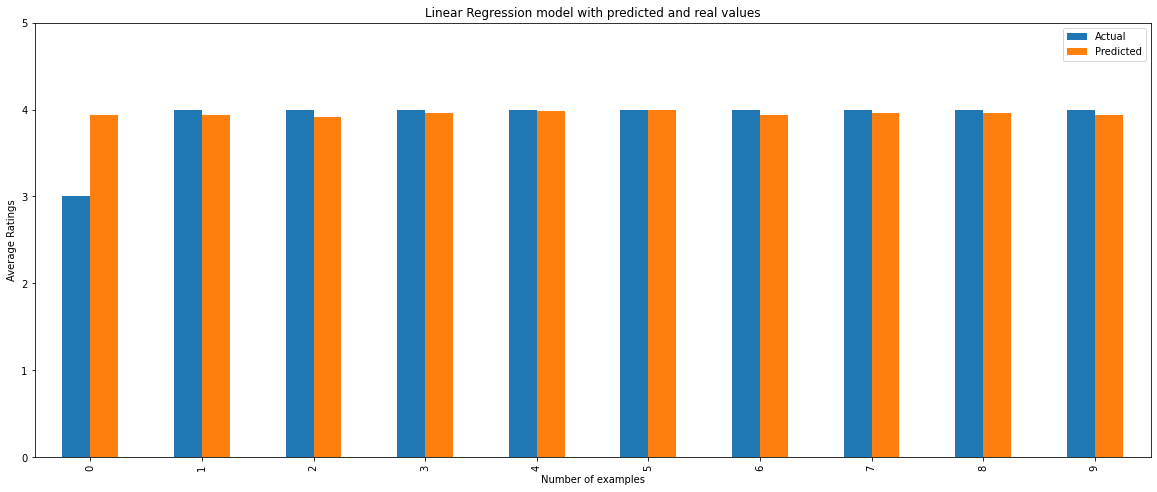

In [28]:
pred1 = pd.DataFrame({'Actual': y1_test.tolist(), 'Predicted': y1_test_pred_lr.tolist()}).head(10)
pred1.head(10)
pred1.plot(kind='bar', figsize=(20, 8))
plt.title('Linear Regression model with predicted and real values')
plt.xlabel('Number of examples')
plt.ylabel('Average Ratings')
plt.ylim(0,5)

### MAE, MSE, R^2, RMSE

In [29]:
print('MAE in Linear Regression train: %.3f, test: %.3f' % (
        mean_absolute_error(y1_train, y1_train_pred_lr),
        mean_absolute_error(y1_test, y1_test_pred_lr)))
print('MSE in Linear Regression train: %.3f, test: %.3f' % (
        mean_squared_error(y1_train, y1_train_pred_lr),
        mean_squared_error(y1_test, y1_test_pred_lr)))
print('R^2 in Linear Regression train: %.3f, test: %.3f' % (
        r2_score(y1_train, y1_train_pred_lr),
        r2_score(y1_test, y1_test_pred_lr)))
print('RMSE in Linear Regression train: %.3f, test: %.3f' % (
        np.sqrt(metrics.mean_squared_error(y1_train, y1_train_pred_lr)),
        np.sqrt(metrics.mean_squared_error(y1_test, y1_test_pred_lr))))

MAE in Linear Regression train: 0.144, test: 0.137
MSE in Linear Regression train: 0.121, test: 0.106
R^2 in Linear Regression train: 0.006, test: 0.018
RMSE in Linear Regression train: 0.348, test: 0.326


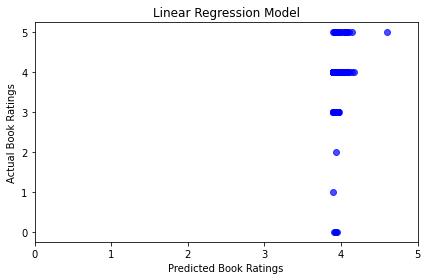

In [30]:
plt.scatter(y1_test_pred_lr, y1_test, alpha = 0.7, color = 'b')
plt.xlabel('Predicted Book Ratings')
plt.ylabel('Actual Book Ratings')
plt.title('Linear Regression Model')
plt.tight_layout()
plt.xlim(0,5)
plt.show()

Here alsothe model woks alright for all books with average ratings at around 4. For all others, it is not appropriate.